In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

In [2]:
table = pd.read_csv('data/OHD.dat')

(0, 2)

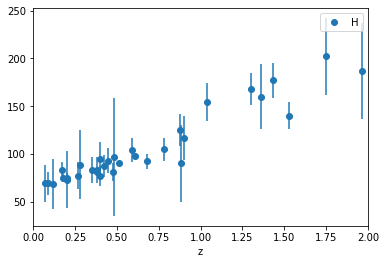

In [3]:
table.plot(x='z', y='H', yerr='uH', fmt='o')

plt.xlim(0, 2)

$$ r(t) = a(t)r_0, ~~~ H(t) = \frac{\dot{a}}{a} $$

$$ H^2(z) = H_0^2 [\Omega_{m0} (1+z)^3 + \Omega_{\Lambda 0}], ~~ \Omega_{m0} + \Omega_{\Lambda 0} = 1, (\text{flat}) $$

$$ H^2(z) = H_0^2 [\Omega_{m0} (1+z)^3 + \Omega_{k0} (1+z)^2 + \Omega_{\Lambda 0}], ~~ \Omega_{m0} + \Omega_{\Lambda 0} = 1 - \Omega_{k0}, (\text{curved}) $$

$$ H_0 = 100 h \frac{Km/s}{Mpc}, \rightarrow h = \frac{H_0}{100Km/s/Mpc} $$

Likelihood:

$$ L(h, \Omega_{m0}, \Omega_{\Lambda 0}) = \prod_i^N L_i(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) $$

$ \epsilon = H(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) - H_i \sim \sigma_H N(0,1)$

$$ L_i(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) = \frac{1}{\sqrt{2\pi}\sigma_H} \exp\{-\frac{(H(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) - H_i)^2}{2\sigma_H^2}\} $$

$$ L(h, \Omega_{m0}, \Omega_{\Lambda 0}) = \frac{1}{\sqrt{2\pi}\prod_i\sigma_{Hi}} \exp\{-\sum_i\frac{(H(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) - H_i)^2}{2\sigma_H^2}\} $$

$$ -2 \log{L} = \sum_i\frac{(H(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) - H_i)^2}{\sigma_H^2} + C$$

minimizar

$$ \chi^2 = \sum_i\frac{(H(z_i, h, \Omega_{m0}, \Omega_{\Lambda 0}) - H_i)^2}{\sigma_H^2} $$

In [132]:
def Hubble(z, h, Om, Ol):
    
    Ok = 1 - Om - Ol
    q = 1+z
    
    Esq = Om*q**3 + Ok*q**2 + Ol
    
    if np.all(Esq > 0) and h > 0:
        
        H0 = 100*h
    
        return H0*np.sqrt(Esq)
    
    return 0

In [133]:
q = (Hubble(table.z, .7, .3, .7) - table.H)/table.uH

(q**2).sum()

20.09978088683653

In [134]:
q@q

20.099780886836534

In [135]:
def chisq(h, Om, Ol):
    
    q = (Hubble(table.z, h, Om, Ol) - table.H)/table.uH
    
    return q@q

In [136]:
from iminuit import Minuit

In [137]:
m = Minuit(chisq, h=.7, Om=.3, Ol=.7, limit_h=(0,1),
       limit_Om=(0,1), limit_Ol=(0,1))

/home/pythoncourse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter h is floating but does not have initial step size. Assume 1.
  
/home/pythoncourse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter Om is floating but does not have initial step size. Assume 1.
  
/home/pythoncourse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: Parameter Ol is floating but does not have initial step size. Assume 1.
  
/home/pythoncourse/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: InitialParamWarning: errordef is not given. Default to 1.
  


In [138]:
m.migrad()

------------------------------------------------------------------
| FCN = 15.74                   |      Ncalls=62 (62 total)      |
| EDM = 8.5E-06 (Goal: 1E-05)   |            up = 1.0            |
------------------------------------------------------------------
|  Valid Min.   | Valid Param.  | Above EDM | Reached call limit |
------------------------------------------------------------------
|     True      |     True      |   False   |       False        |
------------------------------------------------------------------
| Hesse failed  |   Has cov.    | Accurate  | Pos. def. | Forced |
------------------------------------------------------------------
|     False     |     True      |   True    |   True    | False  |
------------------------------------------------------------------
------------------------------------------------------------------------------------------
|   | Name |   Value   | Hesse Err | Minos Err- | Minos Err+ | Limit-  | Limit+  | Fixed |
------------------------------------------------------------------------------------------
| 0 | h    |   0.67    |   0.04    |            |            |    0    |    1    |       |
| 1 | Om   |   0.37    |   0.16    |            |            |    0    |    1    |       |
| 2 | Ol   |   0.70    |   0.29    |            |            |    0    |    1    |       |
------------------------------------------------------------------------------------------

In [139]:
from getdist import plots, MCSamples
from getdist.gaussian_mixtures import GaussianND

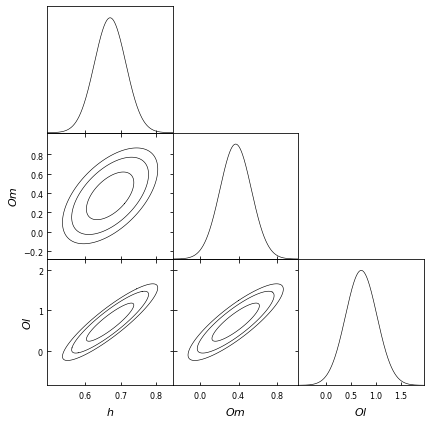

In [140]:
covariance = np.array(m.matrix())
mean = np.array([m.values[p] for p in m.parameters])

gauss=GaussianND(mean, covariance, labels=m.parameters)

g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 3
g.triangle_plot(gauss,filled=False)

In [141]:
h = np.linspace(0.4, 1.0, 30)
Om = np.linspace(0.0, 1.0, 30)
Ol = np.linspace(0.0, 1.0, 30)

In [102]:
H, OM, OL = np.meshgrid(h, Om, Ol)

In [103]:
vchisq = np.vectorize(chisq)

In [104]:
grid = vchisq(H, OM, OL)

KeyboardInterrupt: 

In [17]:
grid.shape

(30, 30, 30)

In [18]:
from getdist.densities import DensityND

In [19]:
points = np.row_stack([H.ravel(), OM.ravel(), OL.ravel()])

In [20]:
points

array([[0.4       , 0.4       , 0.4       , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.03448276, 0.06896552, ..., 0.93103448, 0.96551724,
        1.        ]])

In [21]:
density = DensityND(points, grid.ravel())

In [22]:
density

In [24]:
import emcee

In [142]:
def log_prob(x):
    
    h, Om, Ol = x
    
    x = -0.5*chisq(h, Om, Ol)
    
    if np.isfinite(x):
        return x
    
    return -1e30

In [143]:
ndim, nwalkers = 3, 100
p0 = np.random.random(size=(nwalkers, ndim))

In [144]:
p0.shape

(100, 3)

In [145]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_prob,
                                threads=4)

In [161]:
sampler.run_mcmc(p0, 10000, progress=True)

  0%|          | 21/10000 [00:04<35:22,  4.70it/s]Traceback (most recent call last):
  File "/home/pythoncourse/miniconda3/lib/python3.7/site-packages/emcee/ensemble.py", line 545, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "<ipython-input-142-4216adf8ee8e>", line 5, in log_prob
    x = -0.5*chisq(h, Om, Ol)
  File "<ipython-input-135-6c2311b58d24>", line 3, in chisq
    q = (Hubble(table.z, h, Om, Ol) - table.H)/table.uH
  File "/home/pythoncourse/miniconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py", line 1050, in wrapper
    left, result, index=left.index, name=res_name, dtype=None
  File "/home/pythoncourse/miniconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py", line 919, in _construct_result
    out = left._constructor(result, index=index, dtype=dtype)
  File "/home/pythoncourse/miniconda3/lib/python3.7/site-packages/pandas/core/series.py", line 314, in __init__
    data = sanitize_array(data, index, dtype, copy, raise_cast_failur

emcee: Exception while calling your likelihood function:
  params: [ 0.26146081  1.4543633  -1.79638979]
  args: []
  kwargs: {}
  exception:


KeyboardInterrupt: 

In [147]:
sample = sampler.get_chain(flat=True)

In [148]:
n, dim = sample.shape

In [149]:
nsample = sample[n//5:]

In [150]:
n//5

20000

In [158]:
samples = MCSamples(samples=nsample)

Removed no burn in


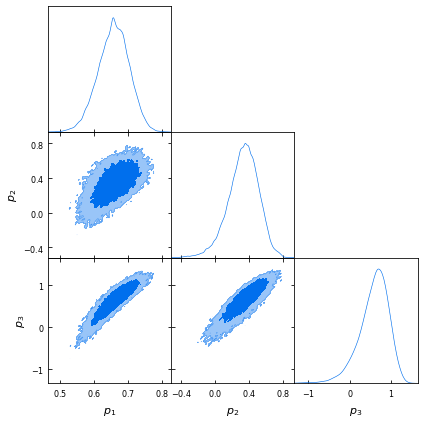

In [159]:
g = plots.get_subplot_plotter()
g.triangle_plot(samples, filled=True, markers='.')

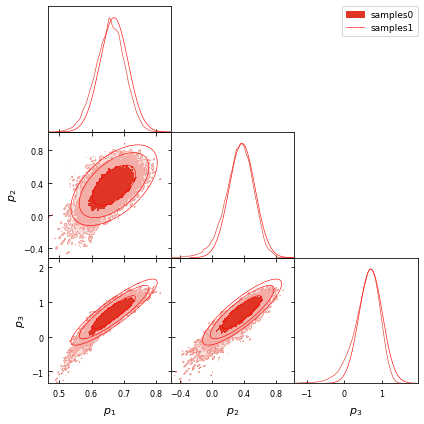

In [160]:
covariance = np.array(m.matrix())
mean = np.array([m.values[p] for p in m.parameters])

gauss=GaussianND(mean, covariance, labels=m.parameters)

g = plots.get_subplot_plotter()
g.settings.num_plot_contours = 3
g.triangle_plot([samples, gauss],filled=[True, False])